In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import hdbscan


%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 20, 'linewidths': 0}

In [19]:
test = pd.read_csv('Mall_Customers.csv')
test.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
test = test.iloc[:,[3,4]].values

In [21]:
test

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

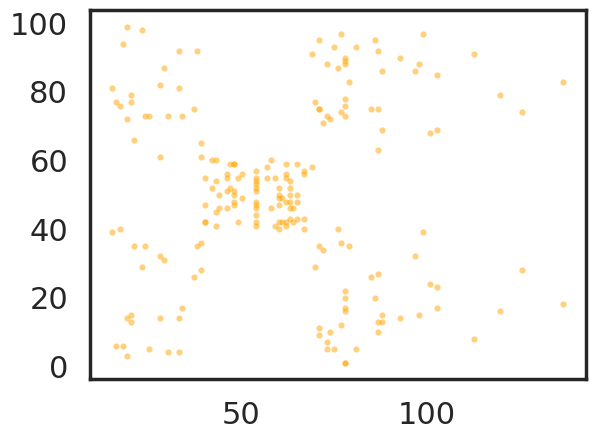

In [22]:
plt.scatter(test[:,0], test[:,1], color='orange', **plot_kwds)

In [23]:
clusterer1 = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
clusterer1.fit(test)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=3)

In [24]:
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer2.fit(test)

HDBSCAN(gen_min_span_tree=True)

In [25]:
clusterer3 = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True)
clusterer3.fit(test)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=9)

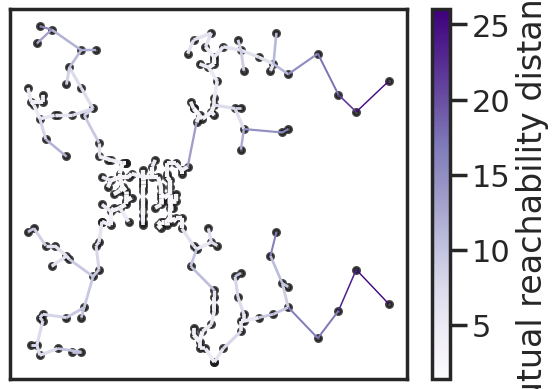

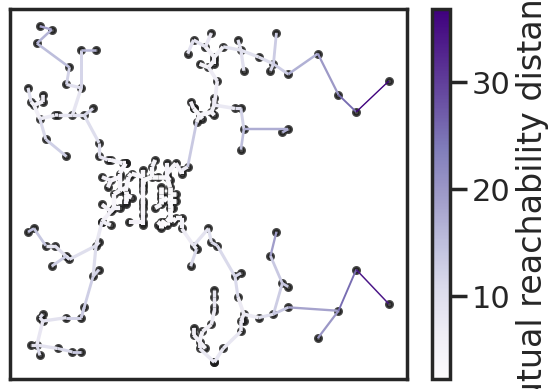

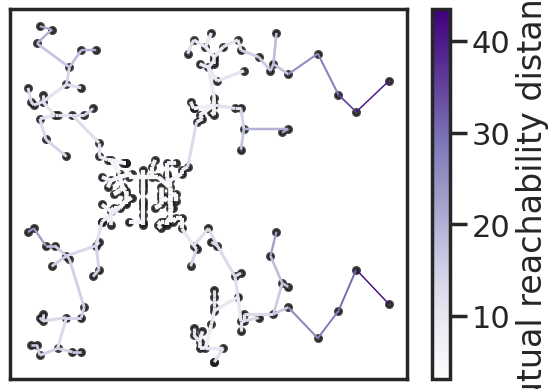

In [35]:
edge_cmap='Purples'
edge_alpha = 1
node_size = 20
edge_linewidth=1

clusterer1.minimum_spanning_tree_.plot(edge_cmap=edge_cmap,
                                      edge_alpha=edge_alpha,
                                      node_size=node_size,
                                      edge_linewidth=edge_linewidth)
plt.show()
clusterer2.minimum_spanning_tree_.plot(edge_cmap=edge_cmap,
                                      edge_alpha=edge_alpha,
                                      node_size=node_size,
                                      edge_linewidth=edge_linewidth)
plt.show()
clusterer3.minimum_spanning_tree_.plot(edge_cmap=edge_cmap,
                                      edge_alpha=edge_alpha,
                                      node_size=node_size,
                                      edge_linewidth=edge_linewidth)
plt.show()

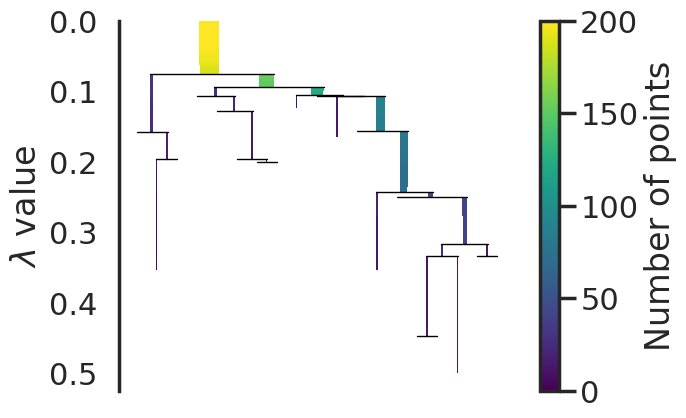

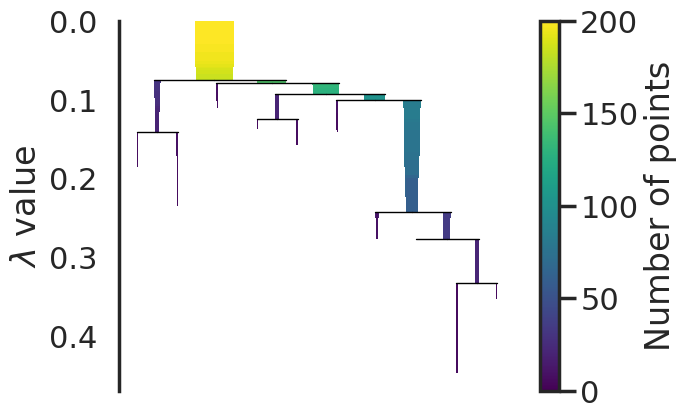

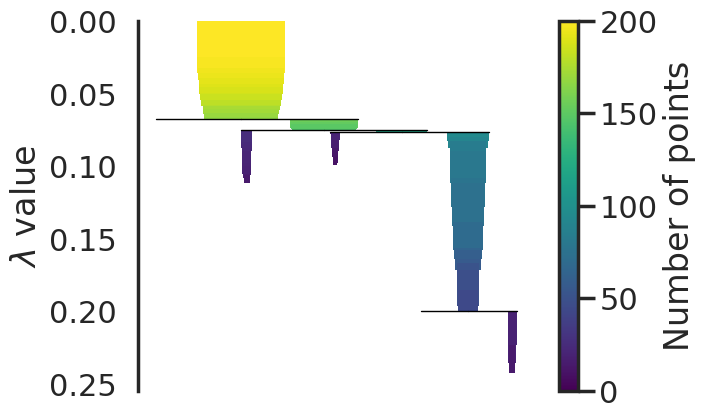

In [30]:
clusterer1.condensed_tree_.plot()
plt.show()
clusterer2.condensed_tree_.plot()
plt.show()
clusterer3.condensed_tree_.plot()
plt.show()

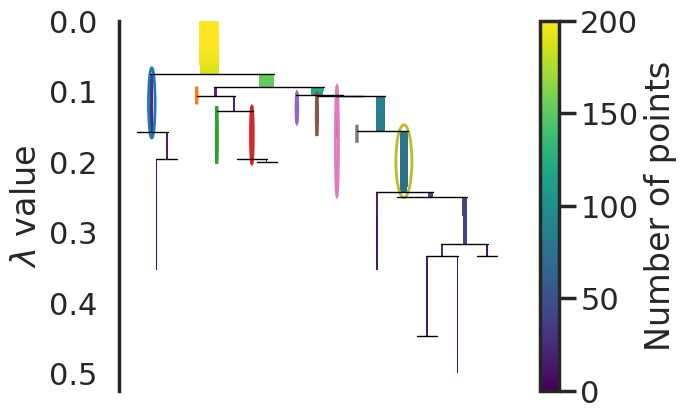

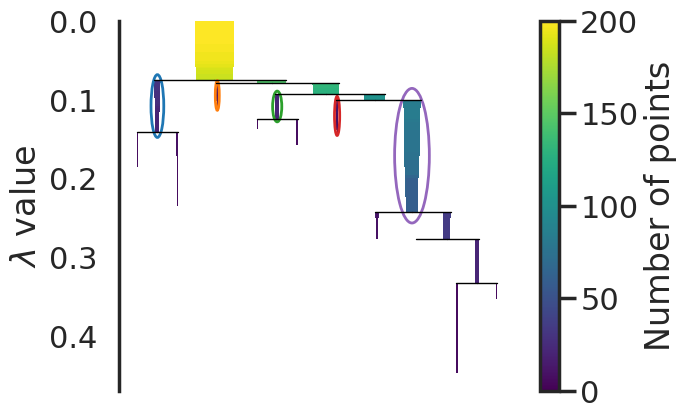

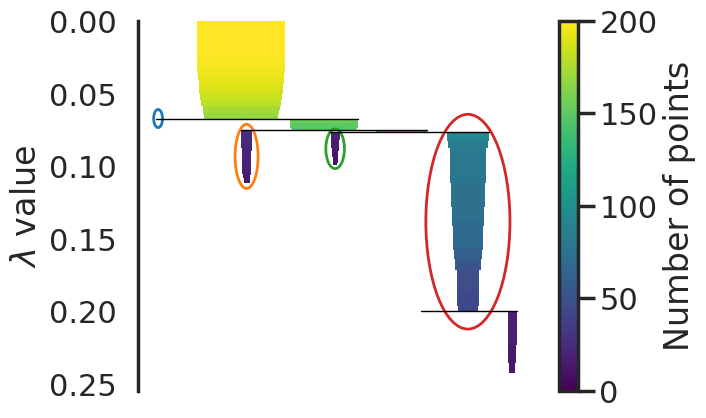

In [28]:
clusterer1.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()
clusterer2.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()
clusterer3.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

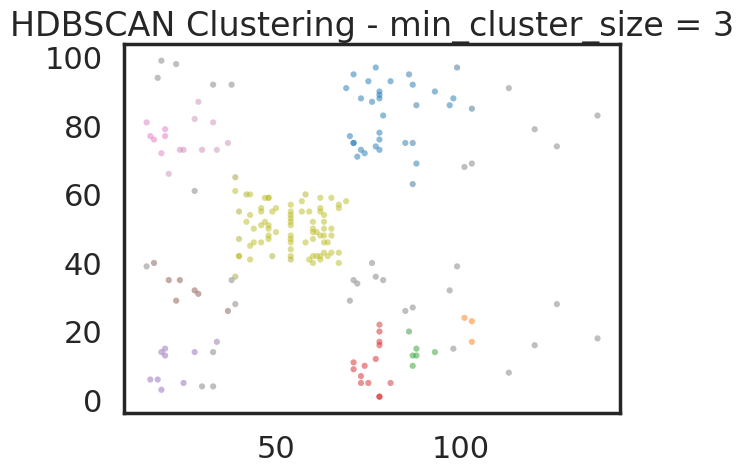

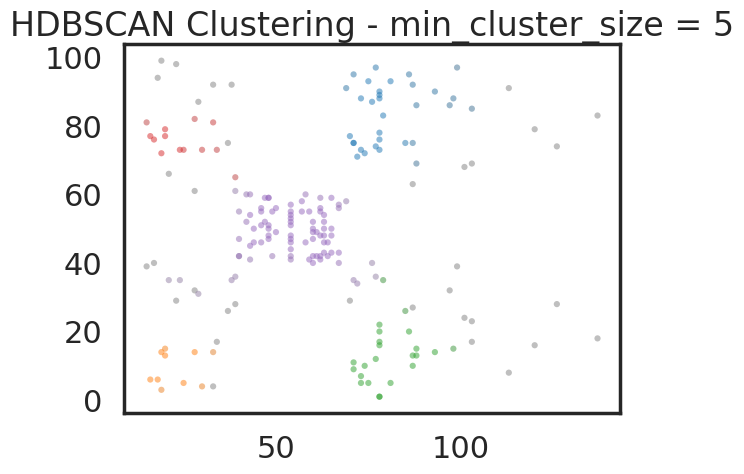

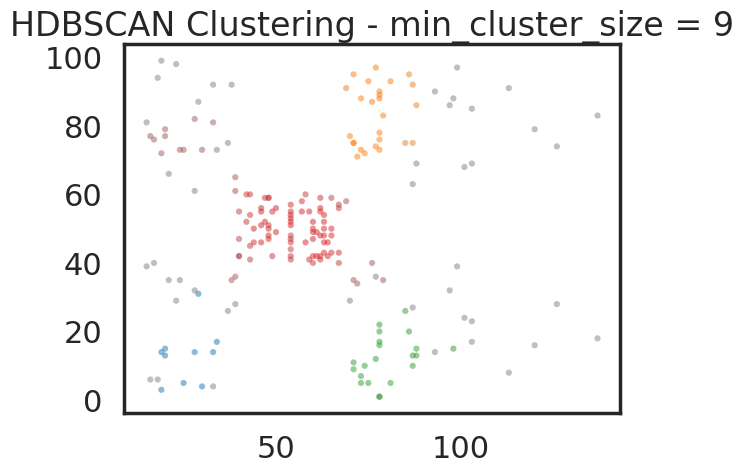

In [29]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer1.labels_, clusterer1.probabilities_)]
plt.scatter(test.T[0], test.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering - min_cluster_size = 3")
plt.show()

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer2.labels_, clusterer2.probabilities_)]
plt.scatter(test.T[0], test.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering - min_cluster_size = 5")
plt.show()

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer3.labels_, clusterer3.probabilities_)]
plt.scatter(test.T[0], test.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering - min_cluster_size = 9")
plt.show()